# Pontificia Universidad Católica del Ecuador
## Facultad de Ingeniería
### Asignatura: CC Datos
**Docente:** Charles Escobar  
**Estudiante:** Nombres y Apellidos

Con el siguiente dataset:

https://www.seracademia.com/academia/Algerian_forest_fires_dataset_UPDATE.csv

Y usando la metodología de ciencia de datos **CRISP-DM** elabore un script en python con tres modelos de aprendizaje de máquina incluyendo entre ellos una red neuronal.

En la estructura solicitada, desarrolle en libreta cada uno de los modelos y como comentarios justifique la selección

Muestre al final del script la comparativa de los tres modelos

Referencia:

https://www.seracademia.com/academia/Algerian_forest_fires_dataset_UPDATE.csv


# Importar librerias

In [1]:
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.compose
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter


# Definicion de una funcion para las metricas de regresion

In [2]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE

    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )


# Establecer apariencia general de los graficos

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)
penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

# Fase 1 (1 punto)


### Comprension del negocio
* #### Establecer objetivos del negocio
    1. ##### Involucrar el 20% de la empresa en nuevos fondos de inversiones.
* #### Evaluar la situacion actual
* #### Fijar los objetivos a nivel de mineria de datos
    3.  Desarrollar un modelo predictivo que pueda anticipar la ocurrencia de incendios en base a las variables del dataset.
* #### Obtener un plan de proyecto


# Fase 2 (1 punto)


### Comprension de los datos
* #### Ejecutar procesos de captura de datos.

In [4]:
df = pd.read_csv('./Algerian_forest_fires_dataset_UPDATE (1).csv',header=1)

* #### Proporcionar una descripcion del juego de los datos.

In [5]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


* #### Realizar tareas de exploracion de los datos.

In [6]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

* #### Gestionar la calidad de los datos, identificando problemas y proporcionando soluciones.

In [7]:
# Obtener los nombres de todas las columnas
column_names = df.columns.tolist()

# Imprimir los nombres
print(column_names)

['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ']


In [8]:
# Quitar espacios al inicio y al final de los nombres de las columnas
df.columns = df.columns.str.strip()

# Aplicar str.strip() a todas las columnas de tipo string
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [9]:
# Mostrar los valores únicos y su conteo para cada columna
for column in df.columns:
    print(f"Valores únicos en la columna '{column}':")
    print(df[column].value_counts())


Valores únicos en la columna 'day':
day
01                               8
02                               8
30                               8
29                               8
28                               8
27                               8
26                               8
25                               8
24                               8
23                               8
22                               8
21                               8
20                               8
19                               8
18                               8
17                               8
16                               8
15                               8
03                               8
04                               8
05                               8
06                               8
07                               8
08                               8
09                               8
10                               8
11                               8
12             

In [10]:

def foundIndex(column, valueSearch):
    # Encontrar las posiciones donde la columna tiene el valor específico
    positions = df[df[column] == f'{valueSearch}'].index
    return df.loc[positions]

def print_results(pairs):

    for column, valueSearch in pairs:
        result = foundIndex(column, valueSearch)
        print(f"Resultados para la columna '{column}' buscando el valor '{valueSearch}':")
        print(result)
        print("\n")

# Lista de pares clave-valor para buscar
search_pairs = [
    ("day", "Sidi-Bel Abbes Region Dataset"),
    ("day", "day"),
    ("month", "month"),
    ("Temperature", "Temperature"),
    ("Ws", "Ws"),
    ("Rain", "Rain"),
    ("Classes", "Classes")
]

# Llamar a la función para imprimir resultados
print_results(search_pairs)


Resultados para la columna 'day' buscando el valor 'Sidi-Bel Abbes Region Dataset':
                               day month year Temperature   RH   Ws Rain FFMC  \
122  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
122  NaN  NaN  NaN  NaN  NaN     NaN  


Resultados para la columna 'day' buscando el valor 'day':
     day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC  DC  ISI  BUI  \
123  day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC  DC  ISI  BUI   

     FWI  Classes  
123  FWI  Classes  


Resultados para la columna 'month' buscando el valor 'month':
     day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC  DC  ISI  BUI  \
123  day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC  DC  ISI  BUI   

     FWI  Classes  
123  FWI  Classes  


Resultados para la columna 'Temperature' buscando el valor 'Temperature':
     day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC  DC  ISI  BUI  \
123  day

# Fase 3 (2 puntos)


* #### Establecer un universo de datos con los que trabajar

In [11]:
df = df.drop(123)
df = df.drop(122)

In [12]:
df = (
    df
    .impute(column_names="Classes", statistic_column_name="mode")
)

In [13]:

columns_to_convert = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI' ]

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

df.dtypes



day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [14]:
def IQR_method (df,n,features):
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of deleted outliers:', df1.shape[0]+df2.shape[0])

    return multiple_outliers


In [15]:
numeric_columns = df.drop(columns=['Classes'])

Outliers_IQR = IQR_method(df,1,numeric_columns)
# dropping outliers
# df1 = df1.drop(Outliers_IQR, axis = 0).reset_index(drop=True)


Total number of deleted outliers: 0


* #### Realizar tareas de limpieza de datos.

In [16]:
(
    df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

DC             1
FWI            1
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
ISI            0
BUI            0
Classes        0
dtype: int64

In [17]:
(
    df[df['DC'].isnull()].index.tolist (),
    df[df['FWI'].isnull()].index.tolist ()
)

([167], [167])

In [18]:
df_clean = df.copy()
df_clean[["DC","FWI"]] = (
    df
    .select_columns("DC","FWI")
    .ffill()
)

C:\Anaconda\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


In [19]:
df_clean

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


* #### Construir un juego de datos apto para ser usado en modelos de mineria de datos.

In [20]:
categorical_columns = df.select_dtypes(object).columns
categorical_columns

Index(['Classes'], dtype='object')

In [21]:
categorical_transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(),categorical_columns),
    remainder="passthrough"
)

In [22]:
df_transformed = (
    pd.DataFrame(
        categorical_transformer.fit_transform(df),
        columns = categorical_transformer.get_feature_names_out(),
        index = df.index
    )
    .rename_columns(
        function = lambda x: x.removeprefix("ordinalencoder__")
    )
    .rename_columns(
        function = lambda x: x.removeprefix("remainder__")
    )
)

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\

In [23]:
df_transformed

,Classes,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1.0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,1.0,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,1.0,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,1.0,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,1.0,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.0,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5
242,1.0,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0
243,1.0,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,1.0,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [24]:
print("Número original de datapoints\n", df_transformed.shape)
df_transformed = df_transformed.dropna()
print("Número actualizado de datapoints\n", df_transformed.shape)

Número original de datapoints
 (244, 14)
Número actualizado de datapoints
 (243, 14)


In [25]:
(
    categorical_transformer
    .named_transformers_
    .get("ordinalencoder")
    .categories_
)

[array(['fire', 'not fire'], dtype=object)]

In [26]:
df_transformed.to_csv('Algerian_clean', index=False, encoding='utf-8')

In [27]:
# df_transformed[categorical_columns] = (
#     categorical_transformer
#     .named_transformers_
#     .ordinalencoder
#     .inverse_transform(
#         X = df_transformed[categorical_columns]
#     )
# )

* #### Integrar datos de fuentes heterogenas si es necesario.
    N/A

# Fase 4 (2 puntos)


### Modelado
* #### Seleccionar las tecnicas de modelado mas adecaudas para nuestro juego de de datos y nuestros objetivos.

In [28]:
X = df_transformed.drop('Classes', axis=1)
y = df_transformed['Classes']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

* #### Fijar una estrategia de verifacion de la calidad del modelo.

* #### Construir un modelo a parter de la aplicacion de las tecnicas seleccionads sobre el juego de datos.

1. ##### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [31]:
RandomForest_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = RandomForest_reg.predict(X_test)

C:\Anaconda\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Anaconda\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Anaconda\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Anaconda\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, c

In [32]:
ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train,y_train,X_test,y_test,y_pred)]

rf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

C:\Anaconda\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Anaconda\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Anaconda\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Anaconda\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, c

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest,0.98627,0.983244,0.8919,0.057338


2. ##### XGBoost

In [33]:
from xgboost import XGBRegressor
# create an xgboost regression model
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

In [34]:
XGBR.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = XGBR.predict(X_test)

In [35]:
ndf = [Reg_Models_Evaluation_Metrics(XGBR,X_train,y_train,X_test,y_test,y_pred)]

XGBR_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
XGBR_score.insert(0, 'Model', 'XGBoost')
XGBR_score


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.980336,0.976004,0.909773,0.068617


3. ##### Redes neuronales

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Capa oculta con 64 neuronas y ReLU
    Dense(32, activation='relu'),  # Segunda capa oculta
    Dense(1, activation='sigmoid')  # Capa de salida (ajustar según el problema)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Ajustar para problemas no binarios


C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Entrenamiento
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.3861 - loss: 95.2668 - val_accuracy: 0.4706 - val_loss: 14.7295
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5941 - loss: 15.0332 - val_accuracy: 0.5000 - val_loss: 1.6059
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5232 - loss: 6.3475 - val_accuracy: 0.6176 - val_loss: 4.9195
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5604 - loss: 5.3698 - val_accuracy: 0.4706 - val_loss: 7.3158
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6103 - loss: 4.2737 - val_accuracy: 0.6176 - val_loss: 4.6318
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6499 - loss: 3.7026 - val_accuracy: 0.4706 - val_loss: 7.2804
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5757 - loss: 4.7777 - val_accuracy: 0.7059 - val_loss: 3.2818
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6808 - loss: 3.0831 - val_accuracy: 0.4706 - val_loss: 3.82

In [38]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}")

Pérdida: 2.6084, Precisión: 0.6027


* #### Ajustar el modelo evaluando su fiabilidad  y su impacto en los objetivos anteriormente establecidos.

# Fase 5 (1 punto)


### Evaluacion del modelo
* #### Evaluar el model o modelos generados hasta el momento.

In [39]:
predictions = pd.concat([ XGBR_score,  rf_score ], ignore_index=True, sort=False)
predictions

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.980336,0.976004,0.909773,0.068617
1,Random Forest,0.986270,0.983244,0.891900,0.057338


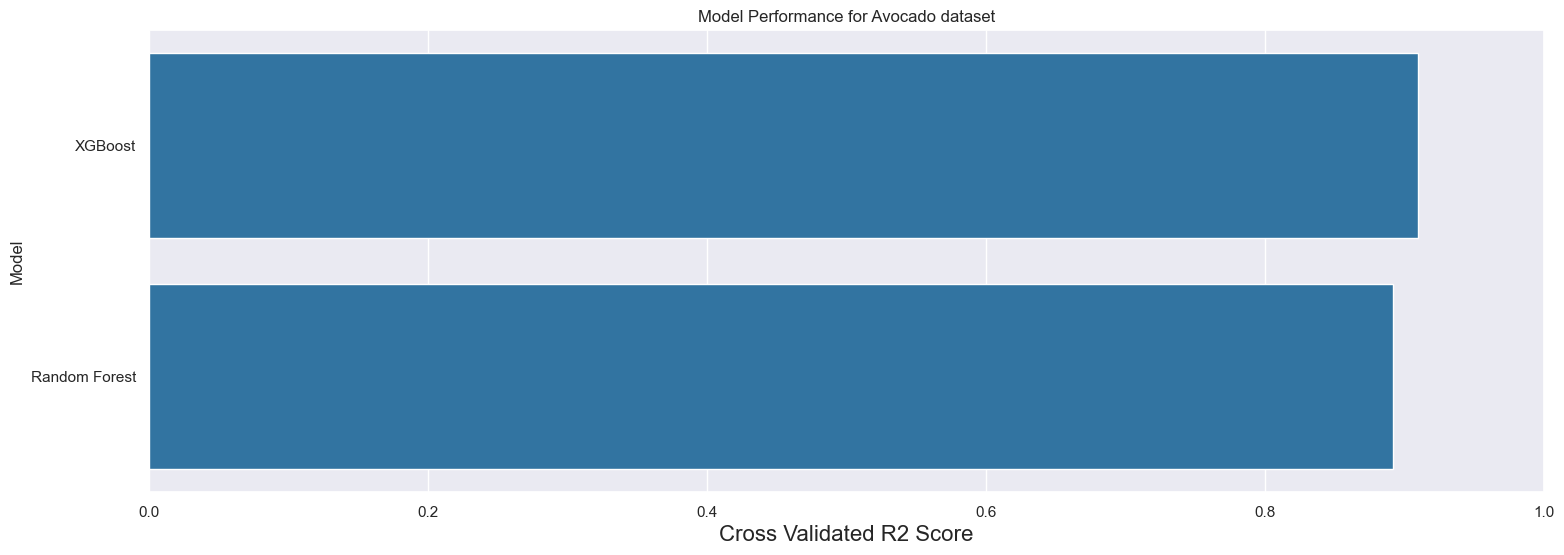

In [40]:

f, axe = plt.subplots(1,1, figsize=(18,6))

predictions.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = predictions, ax = axe)
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

axe.set(title='Model Performance for Avocado dataset')

plt.show()


* #### Revisar todo el proceso de minera de datos que nos ha llevado haste este punto.

* #### Establecer los siguientes pasos a tomar, tanto si se trata de repetir fases anterories como si se trata de abrir nuevas lineas de investigacion.

# Fase 6: (N/A)

## Conclusiones (3 Puntos)
* Detalle 4 conclusiones
 * Una de ellas respecto al procesamiento incial de la data
 * Otra respecto al modelo que mejor se ajuste a la data
 * Otra respecto a que modelo se ajustaría mejor considerando costo beneficio con el consumo de recursos

1. Procesamiento inicial de los datos:
Para garantizar el buen funcionamiento de todos los modelos, primero realizamos una exploración detallada del dataset inicial. Se eliminaron los espacios en blanco de algunos nombres de columnas y se identificaron filas con información incorrecta, procediendo a eliminarlas. Además, se completaron algunos valores faltantes utilizando la media y se eliminó una fila específica que contenía dos valores nulos. Finalmente, la columna objetivo a predecir fue transformada utilizando OrdinalEncoder, permitiendo así que los modelos pudieran procesarla adecuadamente.

2. Modelo que mejor se ajusta a los datos:
El modelo Random Forest fue el que mejor se ajustó a los datos, obteniendo un R² ligeramente más alto y un RMSE más bajo en comparación con los demás modelos evaluados.

3. Equilibrio entre rendimiento y consumo de recursos:
Al comparar los resultados obtenidos de los tres modelos mediante sus respectivas métricas, observamos que el Random Forest ofrece el mejor equilibrio entre rendimiento y consumo de recursos. Su eficiencia en términos de tiempo de entrenamiento y capacidad de generalización lo posiciona como la opción más robusta.

4. Rendimiento de la red neuronal:
El bajo rendimiento de la red neuronal puede deberse a una arquitectura demasiado simple o mal configurada (número de capas, neuronas o funciones de activación). Sería necesario ajustar diversos hiperparámetros y probar distintas configuraciones para mejorar su desempeño y obtener resultados más competitivos.

# Rúbrica
|  Descripción | No resuelve  | Resuelva parcialmente  | Totalmente  |  
|           :--|         :-:|            :-:|          :-:|
| Conoce  como aplicar las fases del modelo CRISP-DM  | 0  | 1  |  2  |    
| Elige apropiadamente los modelos  | 0  | 1  |  2 |  
| Evalúa apropiadamente los modelos  | 0  | 1  |  2 |   
| Conclusiones  | 0  | 2  |  4 |
||Total|5 puntos|10 puntos|